<a href="https://colab.research.google.com/github/norayehia/cifar_data_computervision/blob/main/cnncifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution and ReLU

In [15]:
import numpy as np
from itertools import product

def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, 
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

Filter an image for a particular feature (convolution)
Detect that feature within the filtered image (ReLU)
Condense the image to enhance the features (maximum pooling)

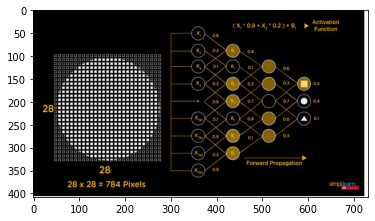

In [34]:

# Python program to read
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread('C:/Users/win/Downloads/datasciencecorce/nn.png')
 
# Output Images
plt.imshow(img)

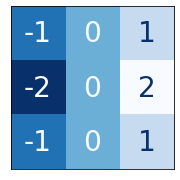

In [16]:
import tensorflow as tf

kernel = tf.constant([
    [-1, 0, 1],
    [-2,  0, 2],
    [-1, 0, 1],
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)


# Custom Convnets

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
#import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import  ImageDataGenerator
from tensorflow.keras.preprocessing import image
import keras
import keras.utils 


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 79s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
BATCH_SIZE = 64
NUM_CLASSES = 10
#binarize
train_labels_categories = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)#.astype('uint8')
train_labels_categories

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# Splitting the training data into train set and validation set
x_train, x_val, y_train, y_val = train_test_split(X_train, train_labels_categories, random_state=0, test_size=0.05)

In [6]:
model=tf.keras.models.Sequential(
[#16 filter ,inputshapesize200*200 RGB *3
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(32, 32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #32 filter
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    #activation and outputlayes
    tf.keras.layers.Dense(512,activation='relu'),
    #2clases need on nerron 
    tf.keras.layers.Dense(10,activation='softmax')
    
]
)

In [11]:
model.compile(loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [12]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=( x_val, y_val))

Epoch 1/10
1485/1485 [==============================] - 84s 54ms/step - loss: 1.5896 - categorical_accuracy: 0.4228 - val_loss: 1.3321 - val_categorical_accuracy: 0.5224
Epoch 2/10
1485/1485 [==============================] - 67s 45ms/step - loss: 0.9592 - categorical_accuracy: 0.6646 - val_loss: 1.0200 - val_categorical_accuracy: 0.6432
Epoch 5/10
1485/1485 [==============================] - 66s 44ms/step - loss: 0.8279 - categorical_accuracy: 0.7137 - val_loss: 1.1305 - val_categorical_accuracy: 0.6340
Epoch 7/10
1485/1485 [==============================] - 70s 47ms/step - loss: 0.7922 - categorical_accuracy: 0.7274 - val_loss: 1.0368 - val_categorical_accuracy: 0.6552
Epoch 8/10
1485/1485 [==============================] - 69s 46ms/step - loss: 0.7680 - categorical_accuracy: 0.7370 - val_loss: 1.0553 - val_categorical_accuracy: 0.6588
Epoch 9/10
1485/1485 [==============================] - 71s 48ms/step - loss: 0.7468 - categorical_accuracy: 0.7435 - val_loss: 1.2719 - val_categoric

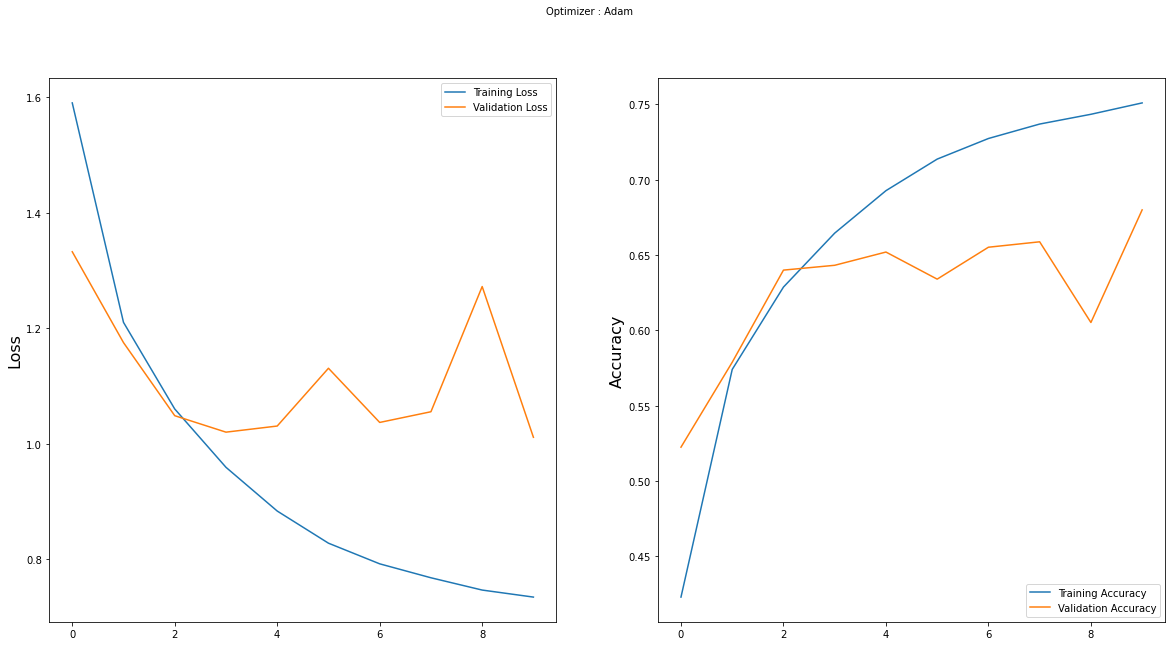

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [25]:
y_pred2g=model.predict(X_test)

In [26]:
y_pred22g = tf.argmax(y_pred2g, axis=-1)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred22g, target_names = class_names))

              precision    recall  f1-score   support

    airplane       0.69      0.74      0.72      1000
  automobile       0.65      0.91      0.76      1000
        bird       0.65      0.48      0.55      1000
         cat       0.49      0.49      0.49      1000
        deer       0.74      0.49      0.59      1000
         dog       0.58      0.56      0.57      1000
        frog       0.79      0.73      0.76      1000
       horse       0.64      0.78      0.70      1000
        ship       0.76      0.76      0.76      1000
       truck       0.72      0.72      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



In [28]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_pred22g)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[745  63  33  15   5   1   5  13  74  46]
 [  9 909   3   3   2   2   2   2  16  52]
 [ 95  22 485  89  54  79  66  51  33  26]
 [ 27  50  39 494  32 153  45  95  37  28]
 [ 37  22  89  76 495  62  49 139  16  15]
 [ 24  21  40 181  21 556  14 105  21  17]
 [ 14  27  40  69  28  47 726  17  17  15]
 [ 26  20  13  46  29  43   4 780   5  34]
 [ 74  82   4  12   3   3   3   9 762  48]
 [ 28 190   5  13   1   5   4  12  22 720]]
